### Nama : Daffa Abiyyu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
trainset = pd.read_csv('trainset.csv')
testset = pd.read_csv('testset.csv')
backtestset = pd.read_csv('backtestset.csv')

# Data Understanding

## EDA

In [3]:
# menampilkan proporsi data kosong pada setiap kolom
null_columns = pd.DataFrame(trainset.isna().sum()/len(trainset), columns=['null'])
null_columns[null_columns['null']>0].sort_values('null', ascending=False)

,null
penghasilan,1.000000
education,1.000000
omset,1.000000
Penanggung,0.917172
Usaha,0.859210
jualan,0.671308
Pekerjaan,0.236097
keluarga,0.185369
gender,0.180486
umur,0.014558


In [4]:
# menghapus kolom yang kosong lebih dari 50%
trainset.drop(['kode pelanggan', 'penghasilan', 'education', 'omset', 'Penanggung', 'Usaha', 'jualan', 'tgl data'], axis=1, inplace=True)
testset.drop(['kode pelanggan', 'penghasilan', 'education', 'omset', 'Penanggung', 'Usaha', 'jualan', 'tgl data'], axis=1, inplace=True)

In [5]:
# mengambil sample trainset sebanyak 10% untuk keperluan EDA
trainset_sample = trainset.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [6]:
# memisahkan fitur dan target
X_train = trainset_sample.drop('flag', axis=1)
y_train = trainset_sample['flag']

In [7]:
# memisahkan data kolom numerik, kolom kategorik, dan kolom kategorik biner
cat_columns = ['kota', 'keluarga', 'Pekerjaan']
cat_columns_binary = ['gender', 'punya_produk1', 'punya_produk2', 'punya_produk3', 'punya_produk4', 'punya_produk5', 'punya_produk6']

X_train_cat = X_train[cat_columns]
X_train_cat_binary = X_train[cat_columns_binary]
X_train_num = X_train.drop(cat_columns+cat_columns_binary, axis=1)

In [8]:
from scipy.stats import skew, skewtest, ttest_ind, f_oneway
from numpy.ma.core import mean

In [ ]:
# EDA univariat kolom numerik
for kolom in X_train_num.columns:
  fig, ax = plt.subplots(1, 2)
  fig.set_figwidth(12)
  fig.set_figheight(5)
  print(f'kolom : {kolom}')
  ax[0].hist(X_train_num[kolom])
  sns.boxplot(X_train_num[kolom], ax=ax[1])
  plt.show()
  mean = X_train_num[kolom].mean()
  std = X_train_num[kolom].std()
  min = X_train_num[kolom].min()
  q1 = X_train_num[kolom].quantile(q=0.25)
  q2 = X_train_num[kolom].quantile(q=0.50)
  q3 = X_train_num[kolom].quantile(q=0.75)
  iqr = q3 - q1
  max = X_train_num[kolom].max()
  upper_whisker = (X_train_num[kolom][X_train_num[kolom] < q3+1.5*iqr]).max()
  lower_whisker = (X_train_num[kolom][X_train_num[kolom] > q1-1.5*iqr]).min()
  outlier = X_train_num[kolom][(X_train_num[kolom]>upper_whisker) | (X_train_num[kolom]<lower_whisker)]
  print(f'mean : {mean}')
  print(f'std : {std}')
  print(f'min : {min}')
  print(f'q1 : {q1}')
  print(f'q2 : {q2}')
  print(f'q3 : {q3}')
  print(f'iqr : {iqr}')
  print(f'max : {max}')
  print(f'upper whisker : {upper_whisker}')
  print(f'lower whisker : {lower_whisker}')
  print(f'outlier\ncount : {outlier.count()}, proportion : {outlier.count()/len(X_train_num)}')
  print(f'skew : {skew(X_train_num[kolom])}')
  print(f'skewtest : {skewtest(X_train_num[kolom])}')
  print('\n'+'*'*100+'\n')

Hampir semua kolom numerik memiliki jumlah nilai nol yang tinggi. Banyak pelanggan yang tidak memiliki hutang dan tidak melakukan transaksi.

In [ ]:
# EDA univariat kolom kategorik
for kolom in X_train_cat:
  print(f'kolom : {kolom}')
  sns.countplot(X_train_cat[kolom])
  plt.xticks(rotation=45)
  plt.show()
  print(X_train_cat[kolom].value_counts())
  print('\n'+'*'*50+'\n')

Mayoritas dari pelanggan adalah pengusaha dan sudah berkeluarga.

In [ ]:
# EDA univariat kolom kategorik biner
for kolom in X_train_cat_binary:
  print(f'kolom : {kolom}')
  sns.countplot(X_train_cat_binary[kolom])
  plt.xticks(rotation=45)
  plt.show()
  print(X_train_cat_binary[kolom].value_counts())
  print('\n'+'*'*50+'\n')

Mayoritas dari pelanggan memiliki produk 3 dan tidak memiliki produk 5.

In [ ]:
# EDA multivariat kolom numerik-numerik
kolom = set()
for kolom1 in X_train_num:
  for kolom2 in X_train_num:
    if kolom1 == kolom2:
      pass
    else:
      if {kolom1, kolom2} in kolom:
        pass
      else:
        print(kolom1, kolom2)
        sns.scatterplot(X_train_num[kolom1], X_train_num[kolom2], hue=y_train)
        plt.show()
        kolom.add(frozenset({kolom1, kolom2}))
        print('\n'+'*'*50+'\n')

Pola pada scatter plot kolom numerik-numerik sulit diamati karena data terpusat di satu titik namun memiliki rentang yang besar.

In [ ]:
# EDA multivariat kolom numerik dan target
for kolom in X_train_num:
  print(f'kolom : {kolom}')
  sns.boxplot(x=y_train, y=X_train_num[kolom])
  plt.show()
  print('\n'+'*'*50+'\n')

Pola pada box plot kolom kategorik dan target sulit diamati karena data terpusat di satu titik namun memiliki rentang yang besar.

In [ ]:
# EDA multivariat kolom kategorik dan target
for kolom in X_train_cat:
  print(f'kolom : {kolom}')
  sns.countplot(X_train_cat[kolom], hue=y_train)
  pd.crosstab(X_train_cat[kolom], y_train, normalize='index').plot(kind='bar', stacked=True)
  plt.xticks(rotation=45)
  plt.show()
  print('\n'+'*'*50+'\n')

Jumlah pelanggan yang tidak membeli produk 7 jauh lebih banyak dari pelanggan yang membeli produk 7.

In [ ]:
# EDA multivariat kolom kategorik biner dan target
for kolom in X_train_cat_binary:
  print(f'kolom : {kolom}')
  sns.countplot(X_train_cat_binary[kolom], hue=y_train)
  pd.crosstab(X_train_cat_binary[kolom], y_train, normalize='index').plot(kind='bar', stacked=True)
  plt.xticks(rotation=45)
  plt.show()
  print('\n'+'*'*50+'\n')

Jumlah pelanggan yang tidak membeli produk 7 jauh lebih banyak dari pelanggan yang membeli produk 7.

# Data Peparation

In [5]:
# memisahkan fitur dan target
## train
X_train = trainset.drop('flag', axis=1)
y_train = trainset['flag']

#test
X_test = testset.drop('flag', axis=1)
y_test = testset['flag']

In [6]:
# cek proporsi target
y_train.value_counts()

0.0    9864
1.0    1195
Name: flag, dtype: int64

In [7]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')

In [8]:
# melakukan undersampling
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [9]:
# memisahkan data kolom numerik, kolom kategorik, dan kolom kategorik biner
cat_columns = ['kota', 'keluarga', 'Pekerjaan']
cat_columns_binary = ['gender', 'punya_produk1', 'punya_produk2', 'punya_produk3', 'punya_produk4', 'punya_produk5', 'punya_produk6']

## train
X_train_cat = X_train_rus[cat_columns]
X_train_cat_binary = X_train_rus[cat_columns_binary]
X_train_num = X_train_rus.drop(cat_columns+cat_columns_binary, axis=1)

## test
X_test_cat = X_test[cat_columns]
X_test_cat_binary = X_test[cat_columns_binary]
X_test_num = X_test.drop(cat_columns+cat_columns_binary, axis=1)

## Missing Value Handling & Data Cleaning

In [10]:
# imputasi data kosong pada kolom numerik
## train
X_train_num_imputed = X_train_num.fillna(X_train_num.median())

## test
X_test_num_imputed = X_test_num.fillna(X_train_num.median())

In [11]:
# imputasi data kosong pada kolom kategorik
## train
X_train_cat_imputed = X_train_cat.copy()
for i in X_train_cat.columns:
    X_train_cat_imputed[i] = X_train_cat[i].fillna(X_train_cat[i].mode()[0])
    
## test
X_test_cat_imputed = X_test_cat.copy()
for i in X_test_cat.columns:
    X_test_cat_imputed[i] = X_test_cat[i].fillna(X_train_cat[i].mode()[0])

In [12]:
# imputasi data kosong pada kolom kategorik biner
## train
X_train_cat_binary_imputed = X_train_cat_binary.copy()
for i in X_train_cat_binary.columns:
    X_train_cat_binary_imputed[i] = X_train_cat_binary[i].fillna(X_train_cat_binary[i].mode()[0])
    
## test
X_test_cat_binary_imputed = X_test_cat_binary.copy()
for i in X_test_cat_binary.columns:
    X_test_cat_binary_imputed[i] = X_test_cat_binary[i].fillna(X_train_cat_binary[i].mode()[0])

# Feature Engineering

## Feature Transformation

In [13]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [14]:
# scaling untuk kolom numerik
rscaler = RobustScaler()
rscaler.fit(X_train_num_imputed)

## train
X_train_num_scaled = pd.DataFrame(rscaler.transform(X_train_num_imputed), columns=X_train_num_imputed.columns)

## test
X_test_num_scaled = pd.DataFrame(rscaler.transform(X_test_num_imputed), columns=X_test_num_imputed.columns)

In [15]:
# encoding untuk kolom kategorik
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat_imputed)

## train
X_train_cat_encoded = pd.DataFrame(ohe.transform(X_train_cat_imputed).toarray())
X_train_cat_encoded.columns = ohe.get_feature_names(X_train_cat_imputed.columns)

## test
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat_imputed).toarray())
X_test_cat_encoded.columns = ohe.get_feature_names(X_test_cat_imputed.columns)

In [16]:
# encoding untuk kolom kategorik biner (gender)
## train
X_train_cat_binary_imputed['gender'].replace(['F', 'M'], [1, 0], inplace=True)

## test
X_test_cat_binary_imputed['gender'].replace(['F', 'M'], [1, 0], inplace=True)

In [17]:
# menggabungkan kolom numerik, kolom kategorik, dan kolom kategorik biner
## train
X_train_transformed = pd.concat([X_train_num_scaled, X_train_cat_encoded, X_train_cat_binary_imputed], axis=1)

## test
X_test_transformed = pd.concat([X_test_num_scaled, X_test_cat_encoded, X_test_cat_binary_imputed], axis=1)

## Feature Selection

In [18]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [19]:
# seleksi 50 fitur terpenting
kbest = SelectKBest(score_func = mutual_info_classif, k=50)
kbest.fit(X_train_transformed, y_train_rus)
X_train_transformed.columns[kbest.get_support()]

Index(['umur', 'average_sisauang_mingguan_1BT',
       'average_sisauang_mingguan_3BT', 'average_sisauang_mingguan_5BT',
       'sisauang_akhir_1BT', 'sisauang_akhir_4BT', 'sisauang_tertahan_1BT',
       'sisauang_tersedia_2BT', 'sisa_hutang_4BT', 'sisa_hutang_5BT',
       'sisa_hutang_6BT', 'jumlah_pembayaran_hutang_1BT',
       'jumlah_pengeluaran_3BT', 'jumlah_pengeluaran_4BT',
       'jumlah_pengeluaran_6BT', 'jumlah_pemasukan_2BT',
       'jumlah_pemasukan_4BT', 'jumlah_pemasukan_5BT', 'jumlah_pemasukan_6BT',
       'frekuensi_pengeluaran_1BT', 'frekuensi_pengeluaran_2BT',
       'frekuensi_pengeluaran_3BT', 'frekuensi_pengeluaran_4BT',
       'frekuensi_pengeluaran_5BT', 'frekuensi_pengeluaran_6BT',
       'frekuensi_pemasukan_1BT', 'frekuensi_pemasukan_2BT',
       'frekuensi_pemasukan_3BT', 'frekuensi_pemasukan_4BT',
       'frekuensi_pemasukan_5BT', 'kota_B', 'kota_C', 'kota_G', 'kota_J',
       'kota_P', 'kota_R', 'keluarga_B', 'keluarga_K',
       'Pekerjaan_Administrasi Umu

In [20]:
# menyimpan dataframe hasil seleksi fitur kedalam variabel baru
## train
X_train_selected = X_train_transformed[X_train_transformed.columns[kbest.get_support()]]

## test
X_test_selected = X_test_transformed[X_test_transformed.columns[kbest.get_support()]]

# Modeling

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# membuat model random forest
rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train_rus)

RandomForestClassifier()

In [23]:
# prediksi dengan model random forest
## train
y_train_pred_rf = rf.predict(X_train_selected)

##test
y_test_pred_rf = rf.predict(X_test_selected)

In [24]:
from sklearn.svm import SVC

In [25]:
# membuat model super vector machine
svc = SVC()
svc.fit(X_train_selected, y_train_rus)

SVC()

In [26]:
# prediksi dengan model svm
## train
y_train_pred_svc = svc.predict(X_train_selected)

##test
y_test_pred_svc = svc.predict(X_test_selected)

## Hyperparameter Optimization & Cross Validation

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

<AxesSubplot:>

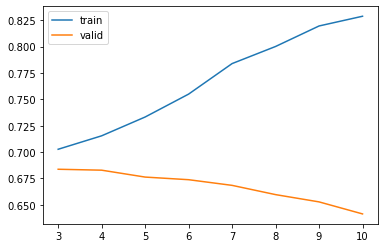

In [28]:
# cross validasi parameter max_depth
max_depths = np.arange(3,11,1)
train = []
valid = []
depths = []
for i in max_depths:
    result = cross_validate(RandomForestClassifier(max_depth=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    depths.append(i)

sns.lineplot(x=depths, y=train, label='train')
sns.lineplot(x=depths, y=valid, label='valid')

<AxesSubplot:>

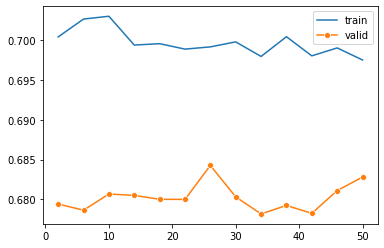

In [29]:
# cross validasi parameter min_samples_split
min_samples_split = np.arange(2,51,4)
train = []
valid = []
for i in min_samples_split:
    result = cross_validate(RandomForestClassifier(max_depth=3,
                                                   min_samples_split=i), 
                   X_train_selected, 
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=min_samples_split, y=train, label='train')
sns.lineplot(x=min_samples_split, y=valid, label='valid', marker='o')

<AxesSubplot:>

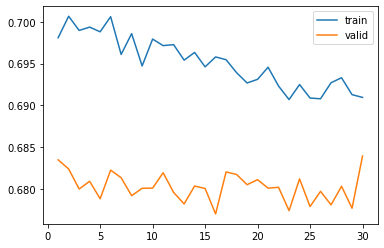

In [30]:
# cross validasi parameter min_samples_leaf
min_samples_leaf = np.arange(1,31,1)
train = []
valid = []
for i in min_samples_leaf:
    result = cross_validate(RandomForestClassifier(max_depth=3, 
                                                   min_samples_split=25, 
                                                   min_samples_leaf=i), 
                   X_train_selected, 
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=min_samples_leaf, y=train, label='train')
sns.lineplot(x=min_samples_leaf, y=valid, label='valid')

<AxesSubplot:>

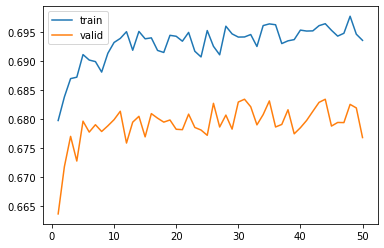

In [31]:
# cross validasi parameter max_features
max_features = np.arange(1,len(X_train_selected.columns)+1)
train = []
valid = []
for i in max_features:
    result = cross_validate(RandomForestClassifier(max_depth=3, 
                                                   min_samples_split=25, 
                                                   min_samples_leaf=30,
                                                   max_features=i), 
                   X_train_selected, 
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=max_features, y=train, label='train')
sns.lineplot(x=max_features, y=valid, label='valid')

<AxesSubplot:>

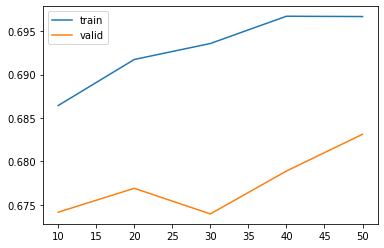

In [32]:
# cross validasi parameter n_estimators
n_estimators = np.arange(10,60,10)
train = []
valid = []
for i in n_estimators:
    result = cross_validate(RandomForestClassifier(max_depth=3, 
                                                   min_samples_split=25, 
                                                   min_samples_leaf=30,
                                                   max_features=35,
                                                   n_estimators=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=n_estimators, y=train, label='train')
sns.lineplot(x=n_estimators, y=valid, label='valid')

<AxesSubplot:>

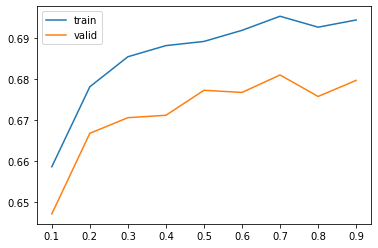

In [33]:
# cross validasi parameter max_samples
max_samples = np.arange(0.1,1,0.1)
train = []
valid = []
for i in max_samples:
    result = cross_validate(RandomForestClassifier(max_depth=3, 
                                                   min_samples_split=25, 
                                                   min_samples_leaf=30,
                                                   max_features=35,
                                                   n_estimators=50,
                                                   max_samples=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=max_samples, y=train, label='train')
sns.lineplot(x=max_samples, y=valid, label='valid')

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# mencari parameter terbaik
param_grid = {'n_estimators':[45,50],
              'max_samples':[0.7,0.9],
              'max_depth':[3,4],
              'min_samples_split':[25, 50],
              'min_samples_leaf':[20,30],
              'max_features':[10,35]}

gscv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)

In [36]:
gscv.fit(X_train_selected, y_train_rus)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4], 'max_features': [10, 35],
                         'max_samples': [0.7, 0.9],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [25, 50],
                         'n_estimators': [45, 50]})

In [37]:
gscv.best_params_

{'max_depth': 4,
 'max_features': 35,
 'max_samples': 0.7,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 45}

In [38]:
# membuat model random forest yang telah dioptimasi
rf_optimized = RandomForestClassifier(**gscv.best_params_)
rf_optimized.fit(X_train_selected, y_train_rus)

RandomForestClassifier(max_depth=4, max_features=35, max_samples=0.7,
                       min_samples_leaf=20, min_samples_split=50,
                       n_estimators=45)

In [39]:
# prediksi dengan model random forest yang telah dioptimasi
y_train_pred_rf_o = rf_optimized.predict(X_train_selected)
y_test_pred_rf_o = rf_optimized.predict(X_test_selected)

<AxesSubplot:>

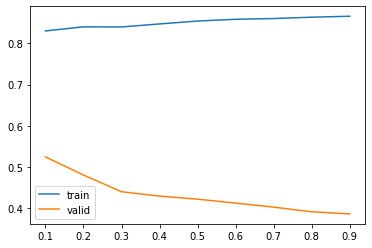

In [40]:
gamma = np.arange(0.1,1,0.1)
train = []
valid = []
for i in gamma:
    result = cross_validate(SVC(kernel='rbf',
                                gamma=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=gamma, y=train, label='train')
sns.lineplot(x=gamma, y=valid, label='valid')

<AxesSubplot:>

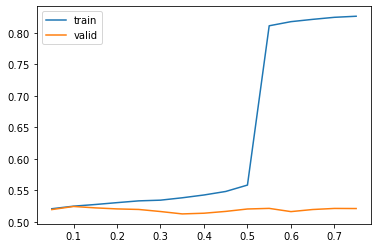

In [41]:
c = np.arange(0.05,0.8,0.05)
train = []
valid = []
for i in c:
    result = cross_validate(SVC(kernel='rbf',
                                gamma=0.1,
                                C=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=c, y=train, label='train')
sns.lineplot(x=c, y=valid, label='valid')

<AxesSubplot:>

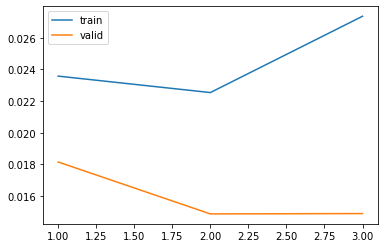

In [44]:
degree = [1,2,3]
train = []
valid = []
for i in degree:
    result = cross_validate(SVC(kernel='poly',
                                degree=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=degree, y=train, label='train')
sns.lineplot(x=degree, y=valid, label='valid')

<AxesSubplot:>

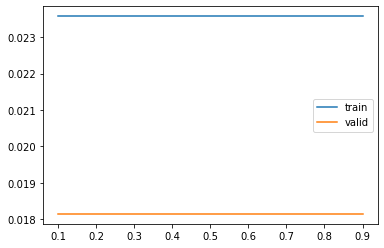

In [45]:
coef0 = np.arange(0.1,1,0.1)
train = []
valid = []
for i in coef0:
    result = cross_validate(SVC(kernel='poly',
                                degree=1,
                                coef0=i), 
                   X_train_selected,
                   y_train_rus, 
                   cv=4, 
                   return_train_score=True,
                   scoring=make_scorer(f1_score, pos_label=1))
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=coef0, y=train, label='train')
sns.lineplot(x=coef0, y=valid, label='valid')

In [46]:

svc_optimized = SVC(kernel='rbf', gamma=0.1, C=0.1)
svc_optimized.fit(X_train_selected, y_train_rus)

SVC(C=0.1, gamma=0.1)

In [47]:

y_train_pred_svc_o = svc_optimized.predict(X_train_selected)
y_test_pred_svc_o = svc_optimized.predict(X_test_selected)

## Perhitungan Performance

In [48]:
from sklearn.metrics import classification_report

In [49]:
# menampilkan performansi model random forest
## default
print('random forest default')

## train
print(classification_report(y_train_rus, y_train_pred_rf, labels=[1,0]))

## test
print(classification_report(y_test, y_test_pred_rf, labels=[1,0]))

random forest default
              precision    recall  f1-score   support

           1       0.94      0.95      0.95      1195
           0       0.95      0.94      0.95      1195

    accuracy                           0.95      2390
   macro avg       0.95      0.95      0.95      2390
weighted avg       0.95      0.95      0.95      2390

              precision    recall  f1-score   support

           1       0.14      0.58      0.22       299
           0       0.92      0.56      0.69      2466

    accuracy                           0.56      2765
   macro avg       0.53      0.57      0.46      2765
weighted avg       0.83      0.56      0.64      2765



In [50]:
## optimized
print('random forest optmized')

## train
print(classification_report(y_train_rus, y_train_pred_rf_o, labels=[1,0]))

## test
print(classification_report(y_test, y_test_pred_rf_o, labels=[1,0]))

random forest optmized
              precision    recall  f1-score   support

           1       0.57      0.90      0.70      1195
           0       0.76      0.31      0.44      1195

    accuracy                           0.61      2390
   macro avg       0.66      0.61      0.57      2390
weighted avg       0.66      0.61      0.57      2390

              precision    recall  f1-score   support

           1       0.13      0.86      0.22       299
           0       0.95      0.29      0.45      2466

    accuracy                           0.36      2765
   macro avg       0.54      0.58      0.34      2765
weighted avg       0.86      0.36      0.42      2765



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
# menampilkan confusion matrix data test pada model random forest
## default
print('random forest default')
confusion_matrix(y_test, y_test_pred_rf)

random forest default


array([[1378, 1088],
       [ 125,  174]], dtype=int64)

In [53]:
## optimized
print('random forest optmized')
confusion_matrix(y_test, y_test_pred_rf_o)

random forest optmized


array([[ 726, 1740],
       [  42,  257]], dtype=int64)

In [54]:
# menampilkan performansi model svm
## default
print('svm default')

## train
print(classification_report(y_train_rus, y_train_pred_svc, labels=[1,0]))

## test
print(classification_report(y_test, y_test_pred_svc, labels=[1,0]))

svm default
              precision    recall  f1-score   support

           1       0.59      0.06      0.11      1195
           0       0.50      0.96      0.66      1195

    accuracy                           0.51      2390
   macro avg       0.55      0.51      0.38      2390
weighted avg       0.55      0.51      0.38      2390

              precision    recall  f1-score   support

           1       0.07      0.03      0.05       299
           0       0.89      0.95      0.92      2466

    accuracy                           0.85      2765
   macro avg       0.48      0.49      0.48      2765
weighted avg       0.80      0.85      0.82      2765



In [55]:
## optimized
print('svm optmized')

## train
print(classification_report(y_train_rus, y_train_pred_svc_o, labels=[1,0]))

## test
print(classification_report(y_test, y_test_pred_svc_o, labels=[1,0]))

svm optmized
              precision    recall  f1-score   support

           1       0.55      0.51      0.53      1195
           0       0.54      0.59      0.56      1195

    accuracy                           0.55      2390
   macro avg       0.55      0.55      0.55      2390
weighted avg       0.55      0.55      0.55      2390

              precision    recall  f1-score   support

           1       0.13      0.51      0.20       299
           0       0.91      0.57      0.70      2466

    accuracy                           0.56      2765
   macro avg       0.52      0.54      0.45      2765
weighted avg       0.82      0.56      0.65      2765



In [56]:
# menampilkan confusion matrix data test pada model svm
## default
print('svm default')
confusion_matrix(y_test, y_test_pred_svc)

svm default


array([[2334,  132],
       [ 289,   10]], dtype=int64)

In [57]:
## optimized
print('svm optmized')
confusion_matrix(y_test, y_test_pred_svc_o)

svm optmized


array([[1410, 1056],
       [ 147,  152]], dtype=int64)

# Evaluasi

## Backtesting

In [58]:
# menghapus kolom yang kosong lebih dari 50%
backtestset.drop(['kode pelanggan', 'penghasilan', 'education', 'omset', 'Penanggung', 'Usaha', 'jualan', 'tgl data'], axis=1, inplace=True)

# memisahkan data kolom numerik, kolom kategorik, dan kolom kategorik biner
backtestset_cat = backtestset[cat_columns]
backtestset_cat_binary = backtestset[cat_columns_binary]
backtestset_num = backtestset.drop(cat_columns+cat_columns_binary, axis=1)

# imputasi data kosong pada kolom numerik
backtestset_num_imputed = backtestset_num.fillna(X_train_num.median())

# imputasi data kosong pada kolom kategorik
backtestset_cat_imputed = backtestset_cat.copy()
for i in backtestset_cat.columns:
    backtestset_cat_imputed[i] = backtestset_cat[i].fillna(X_train_cat[i].mode()[0])

# imputasi data kosong pada kolom kategorik biner
backtestset_cat_binary_imputed = backtestset_cat_binary.copy()
for i in backtestset_cat_binary.columns:
    backtestset_cat_binary_imputed[i] = backtestset_cat_binary[i].fillna(X_train_cat_binary[i].mode()[0])

# scaling untuk kolom numerik
backtestset_num_scaled = pd.DataFrame(rscaler.transform(backtestset_num_imputed), columns=backtestset_num_imputed.columns)

# encoding untuk kolom kategorik
backtestset_cat_encoded = pd.DataFrame(ohe.transform(backtestset_cat_imputed).toarray())
backtestset_cat_encoded.columns = ohe.get_feature_names(backtestset_cat_imputed.columns)

# encoding untuk kolom kategorik biner (gender)
backtestset_cat_binary_imputed['gender'].replace(['F', 'M'], [1, 0], inplace=True)

# menggabungkan kolom numerik, kolom kategorik, dan kolom kategorik biner
backtestset_transformed = pd.concat([backtestset_num_scaled, backtestset_cat_encoded, backtestset_cat_binary_imputed], axis=1)

# menyimpan dataframe hasil seleksi fitur kedalam variabel baru
backtestset_selected = backtestset_transformed[backtestset_transformed.columns[kbest.get_support()]]

In [63]:
# prediksi dengan model random forest default
y_backtest = pd.DataFrame(rf.predict(backtestset_selected), columns=['flag'])
y_backtest

,flag
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3451,1.0
3452,0.0
3453,0.0
3454,0.0


In [64]:
backtestset = pd.read_csv('backtestset.csv')
predicted_backtestset = pd.concat([backtestset, y_backtest], axis=1)
predicted_backtestset.to_csv('predicted_backtestset.csv', index=False)